<a href="https://colab.research.google.com/github/patibandlavenkatamanideep/Business_Case_Studies---Analytics/blob/main/Yulu_Business_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### YULU BUSINESS CASE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import shapiro

In [ ]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089"
df = pd.read_csv(url)

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df.sample(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
540,2011-02-05 16:00:00,1,0,0,3,9.02,11.365,100,8.9981,8,63,71
10339,2012-11-16 05:00:00,4,0,1,2,12.30,15.910,65,6.0032,2,34,36
753,2011-02-14 18:00:00,1,0,1,1,16.40,20.455,40,40.9973,11,194,205
3809,2011-09-09 17:00:00,3,0,1,1,28.70,33.335,79,16.9979,54,451,505
1030,2011-03-07 11:00:00,1,0,1,1,10.66,10.605,48,30.0026,19,41,60
...,...,...,...,...,...,...,...,...,...,...,...,...
9902,2012-10-16 23:00:00,4,0,1,1,16.40,20.455,71,0.0000,23,176,199
6790,2012-04-01 05:00:00,2,0,0,2,13.94,17.425,81,6.0032,8,10,18
9936,2012-10-18 09:00:00,4,0,1,2,20.50,24.240,77,11.0014,41,346,387
2218,2011-05-19 08:00:00,2,0,1,2,21.32,25.000,88,0.0000,34,453,487


In [ ]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [ ]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [ ]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [ ]:
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}

# Convert 'season' column using map function
df['season'] = df['season'].map(season_mapping)

In [ ]:
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9026,2012-08-18 11:00:00,fall,0,0,1,29.52,33.335,51,0.0000,180,356,536
9997,2012-11-01 22:00:00,winter,0,1,1,14.76,17.425,57,11.0014,27,175,202
3868,2011-09-12 05:00:00,fall,0,1,1,22.96,26.515,83,0.0000,1,23,24
2534,2011-06-13 12:00:00,summer,0,1,1,27.06,31.060,41,19.0012,35,161,196
8922,2012-08-14 03:00:00,fall,0,1,2,27.88,31.820,83,12.9980,0,3,3
5338,2011-12-16 12:00:00,winter,0,1,2,13.94,15.150,42,23.9994,10,163,173
9940,2012-10-18 13:00:00,winter,0,1,1,25.42,31.060,53,23.9994,96,236,332
3678,2011-09-04 04:00:00,fall,0,0,1,26.24,28.790,83,11.0014,0,4,4
10100,2012-11-06 05:00:00,winter,0,1,2,9.02,11.365,64,12.9980,1,40,41
4317,2011-10-11 22:00:00,winter,0,1,2,22.96,26.515,83,12.9980,27,120,147


In [ ]:
weather_mapping = {1: 'cloudy', 2: 'misty', 3: 'rainy', 4: 'thunderstorm'}

df['weather'] = df['weather'].map(weather_mapping)

In [ ]:
df.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']) #Converting object dtype to datetime dtype

In [ ]:
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
7067,2012-04-12 20:00:00,2,0,1,cloudy,18.04,21.970,33,16.9979,26,254,280
1002,2011-03-06 06:00:00,1,0,0,misty,17.22,21.210,94,23.9994,1,1,2
6383,2012-03-03 05:00:00,1,0,0,misty,14.76,18.180,93,6.0032,1,1,2
2021,2011-05-11 03:00:00,2,0,1,cloudy,20.50,24.240,63,15.0013,0,3,3
3768,2011-09-07 23:00:00,3,0,1,rainy,25.42,27.275,94,12.9980,3,21,24
3899,2011-09-13 12:00:00,3,0,1,cloudy,29.52,33.335,58,15.0013,43,144,187
3919,2011-09-14 08:00:00,3,0,1,cloudy,25.42,28.790,83,11.0014,33,396,429
8396,2012-07-11 05:00:00,3,0,1,cloudy,26.24,28.790,89,0.0000,5,36,41
7411,2012-05-08 04:00:00,2,0,1,misty,21.32,25.000,68,22.0028,0,5,5
8992,2012-08-17 01:00:00,3,0,1,cloudy,27.06,12.120,65,7.0015,16,38,54


In [ ]:
df.describe()

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454




**STATISTICAL SUMMARY**


Season:
The dataset consists of four seasons: 1 (spring), 2 (summer), 3 (fall), and 4 (winter).
The most common season in the dataset is the third season (fall), with a mean value of approximately 2.51.


Holiday:
The dataset contains both holiday (1) and non-holiday (0) instances.
On average, there are holidays in approximately 2.9% of the observations.


Workingday:
The dataset represents both working days (1) and non-working days (0).
On average, around 68.1% of the observations correspond to working days.


Weather:
The weather conditions in the dataset range from 1 to 4, indicating different categories of weather.
The mean value suggests an average weather condition of approximately 1.42


Temperature, Feeling Temperature, Humidity, and Windspeed:
The dataset includes numerical measurements for temperature, feeling temperature, humidity, and windspeed.
The mean values indicate the average temperature, feeling temperature, humidity, and windspeed across all observations.


Casual, Registered, and Count:
The dataset provides counts for casual, registered, and total bike rentals.
The mean values suggest the average number of casual, registered, and total bike rentals.

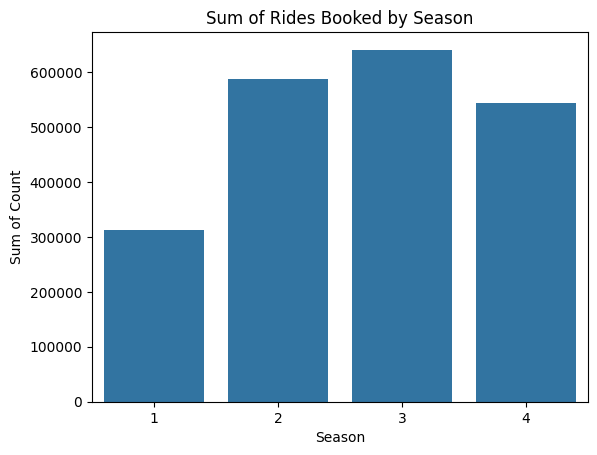

In [ ]:

# Calculate the sum of 'count' column for each season
season_count_sum = df.groupby('season')['count'].sum().reset_index()

# Plotting the bar plot
sns.barplot(data=season_count_sum, x='season', y='count')

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Sum of Count')
plt.title('Sum of Rides Booked by Season')

# Display the plot
plt.show()

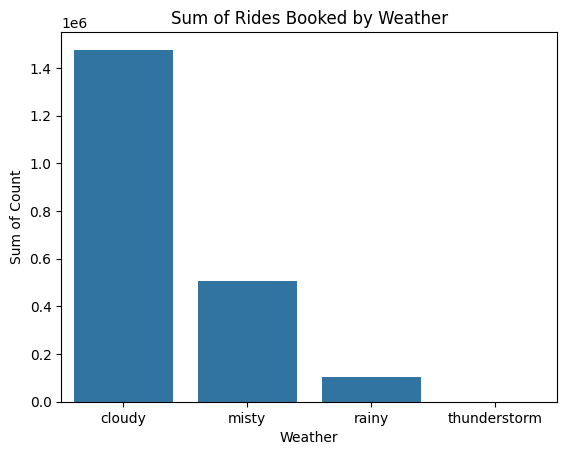

In [ ]:
# Calculate the sum of 'count' column for each weather condition
weather_count_sum = df.groupby('weather')['count'].sum().reset_index()

# Plotting the bar plot
sns.barplot(data=weather_count_sum, x='weather', y='count')

# Adding labels and title
plt.xlabel('Weather')
plt.ylabel('Sum of Count')
plt.title('Sum of Rides Booked by Weather')

# Display the plot
plt.show()

In [ ]:
casual_sum =  np.sum(df['casual'])
registered_sum =  np.sum(df['registered'])

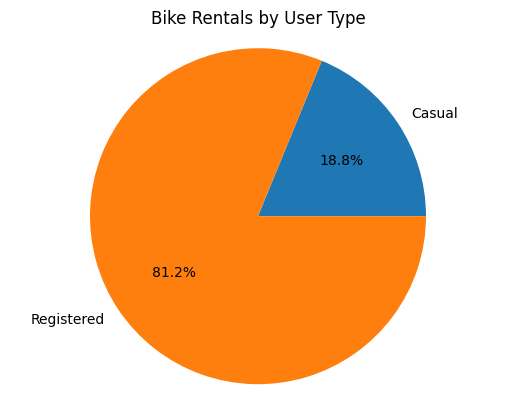

In [ ]:


# Create a list of values
counts = [casual_sum, registered_sum]

# Create a list of labels
labels = ['Casual', 'Registered']

# Plotting the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Adding a title
plt.title('Bike Rentals by User Type')

# Set aspect ratio to be equal to create a circular pie chart
plt.axis('equal')

# Display the plot
plt.show()

In [ ]:
# Sum of bikes rented on a working day
bikes_rented_workingday = df[df['workingday'] == 1]['count'].sum()

# Sum of bikes rented on a holiday
bikes_rented_holiday = df[df['holiday'] == 1]['count'].sum()

# Print the results
print("Total bikes rented on a working day:", bikes_rented_workingday)
print("Total bikes rented on a holiday:", bikes_rented_holiday)

Total bikes rented on a working day: 1430604
Total bikes rented on a holiday: 57808


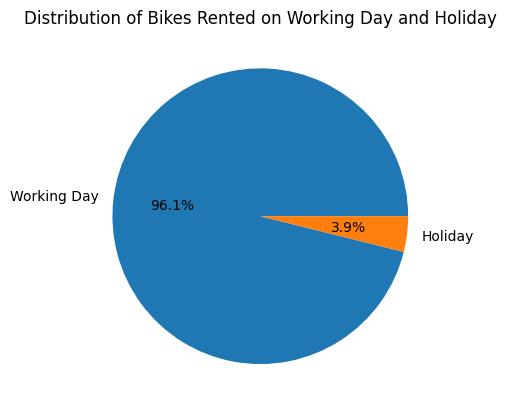

In [ ]:

# Create labels for the pie chart
labels = ['Working Day', 'Holiday']

# Create values for the pie chart
values = [bikes_rented_workingday, bikes_rented_holiday]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Distribution of Bikes Rented on Working Day and Holiday')

# Display the pie chart
plt.show()

<ipython-input-29-2ac3c97062e9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='temp', palette='Blues')
<ipython-input-29-2ac3c97062e9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='atemp', palette='Greens')
<ipython-input-29-2ac3c97062e9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='humidity', palette='Oranges')
<ipython-input-29-2ac3c97062e9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legen

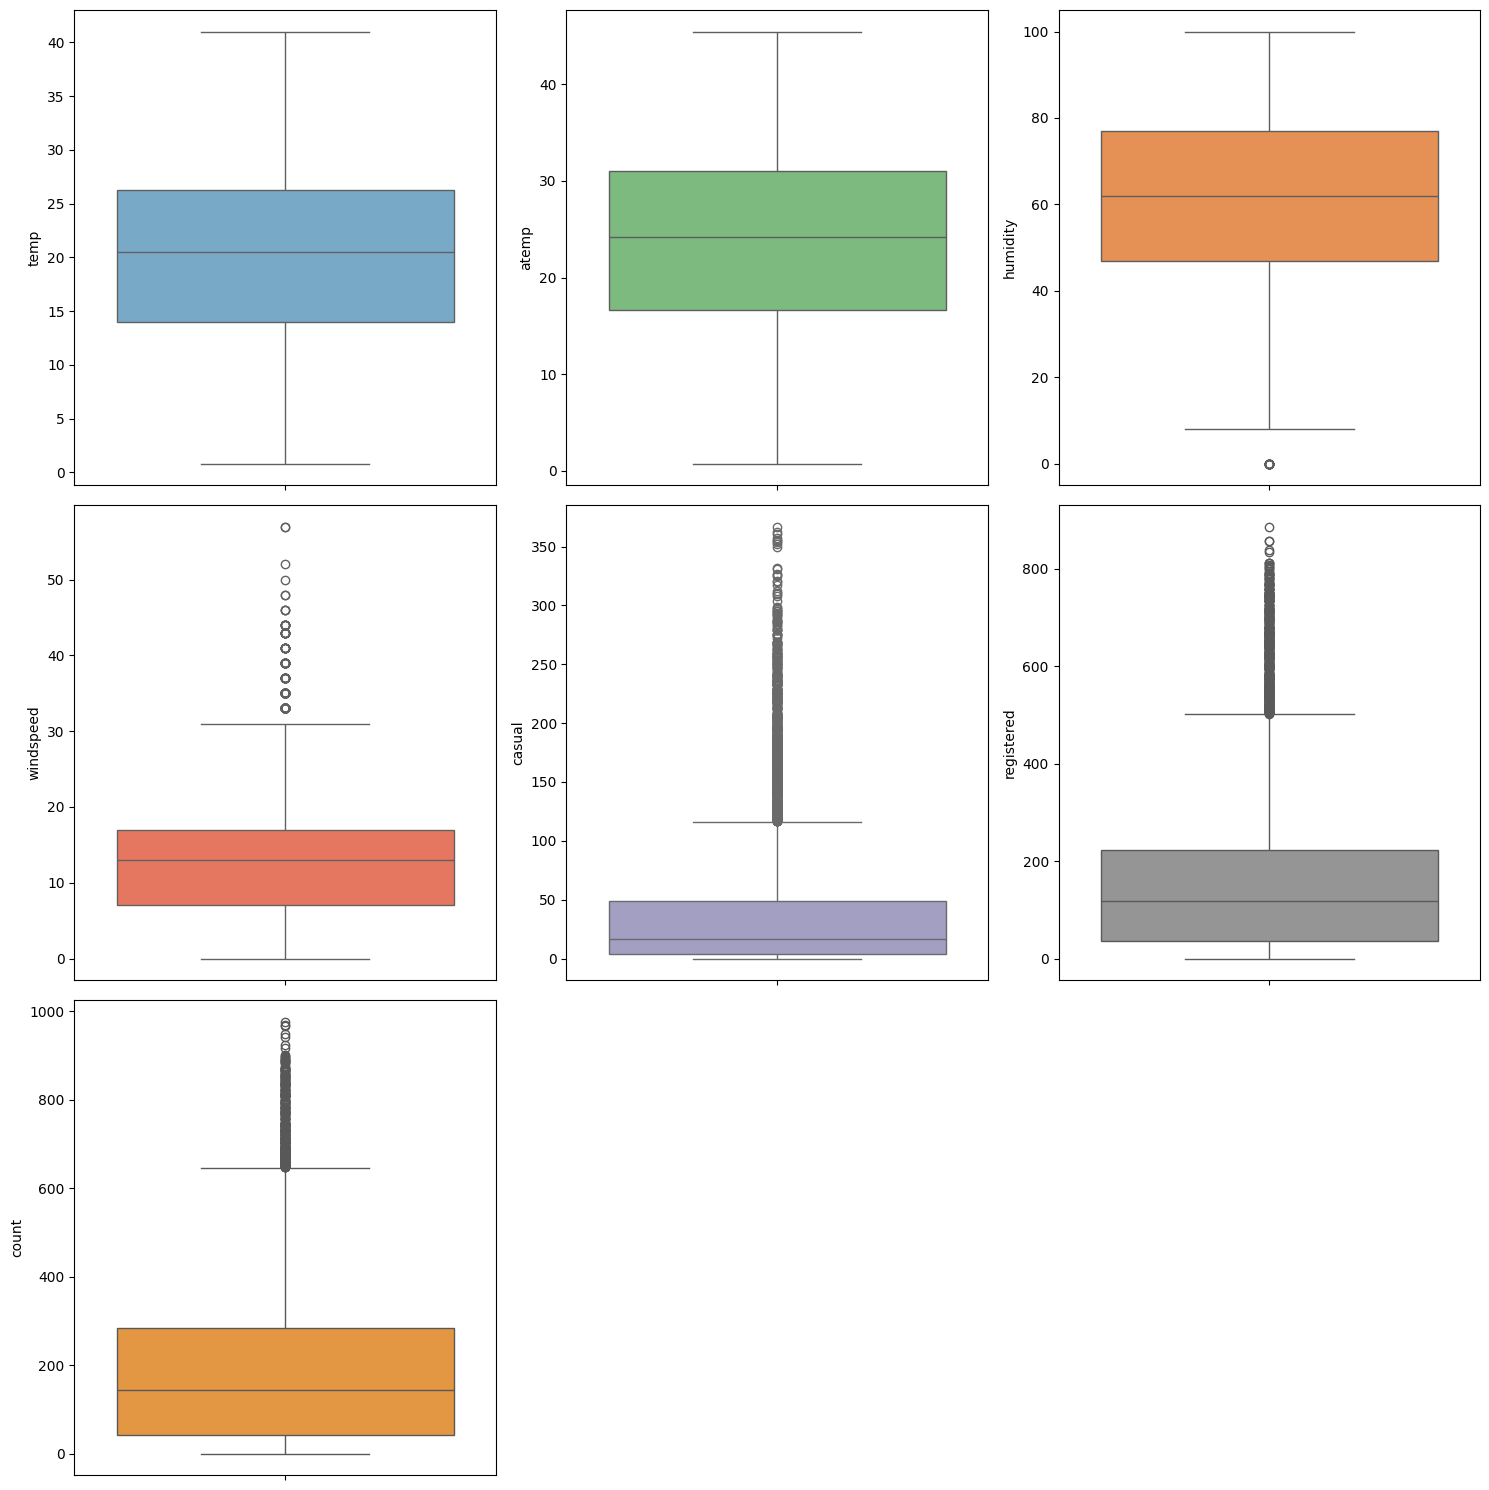

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 3, 1)
sns.boxplot(data=df, y='temp', palette='Blues')
plt.subplot(3, 3, 2)
sns.boxplot(data=df, y='atemp', palette='Greens')
plt.subplot(3, 3, 3)
sns.boxplot(data=df, y='humidity', palette='Oranges')
plt.subplot(3, 3, 4)
sns.boxplot(data=df, y='windspeed', palette='Reds')
plt.subplot(3, 3, 5)
sns.boxplot(data=df, y='casual', palette='Purples')
plt.subplot(3, 3, 6)
sns.boxplot(data=df, y='registered', palette='Greys')
plt.subplot(3, 3, 7)
sns.boxplot(data=df, y='count', palette='YlOrBr')

plt.tight_layout()
plt.show()

In [ ]:
df['month'] = df['datetime'].dt.month #Adding Month Column to visualize the bike rentals month wise
df['year'] = df['datetime'].dt.year
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,year
0,2011-01-01 00:00:00,1,0,0,cloudy,9.84,14.395,81,0.0000,3,13,16,1,2011
1,2011-01-01 01:00:00,1,0,0,cloudy,9.02,13.635,80,0.0000,8,32,40,1,2011
2,2011-01-01 02:00:00,1,0,0,cloudy,9.02,13.635,80,0.0000,5,27,32,1,2011
3,2011-01-01 03:00:00,1,0,0,cloudy,9.84,14.395,75,0.0000,3,10,13,1,2011
4,2011-01-01 04:00:00,1,0,0,cloudy,9.84,14.395,75,0.0000,0,1,1,1,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,cloudy,15.58,19.695,50,26.0027,7,329,336,12,2012
10882,2012-12-19 20:00:00,4,0,1,cloudy,14.76,17.425,57,15.0013,10,231,241,12,2012
10883,2012-12-19 21:00:00,4,0,1,cloudy,13.94,15.910,61,15.0013,4,164,168,12,2012
10884,2012-12-19 22:00:00,4,0,1,cloudy,13.94,17.425,61,6.0032,12,117,129,12,2012


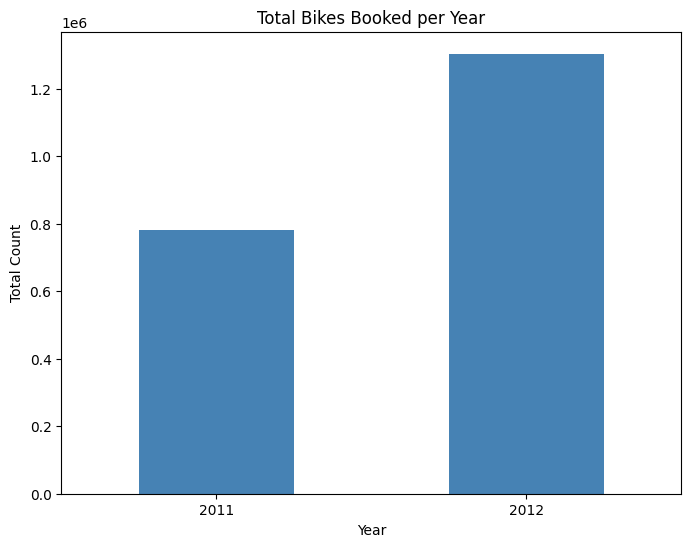

In [ ]:
yearly_count = df.groupby('year')['count'].sum()

# Plotting the total count per year
plt.figure(figsize=(8, 6))
yearly_count.plot(kind='bar', color='steelblue')
plt.title('Total Bikes Booked per Year')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
df_2011 = df[df['year'] == 2011]
df_2012 = df[df['year'] == 2012]

# Calculate the sum of bikes booked in each year
sum_2011 = df_2011['count'].sum()
sum_2012 = df_2012['count'].sum()

print(f"Total bikes booked in 2011: {sum_2011}")
print(f"Total bikes booked in 2012: {sum_2012}")

Total bikes booked in 2011: 781979
Total bikes booked in 2012: 1303497


In [ ]:
# Calculate the percentage hike
percentage_hike = ((sum_2012 - sum_2011) / sum_2011) * 100

print(f"The percentage hike in the number of bikes booked between 2011 and 2012 is: {percentage_hike:.2f}%")


The percentage hike in the number of bikes booked between 2011 and 2012 is: 66.69%


# As the target variable is following log-normal Distribution so we have to transform it into normal Distribution

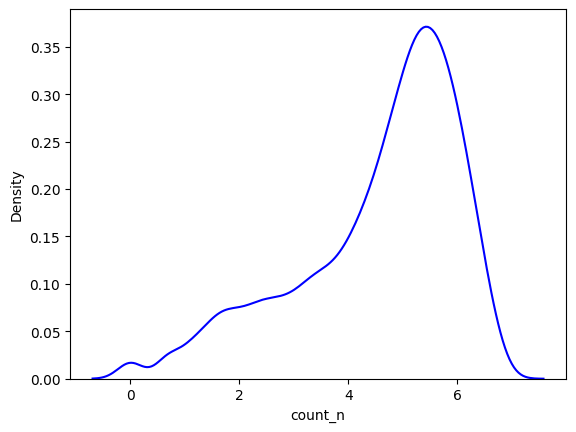

In [ ]:
df['count_n'] = np.log(df['count'])

sns.kdeplot(data = df, x = 'count_n', color = 'blue')
plt.show()

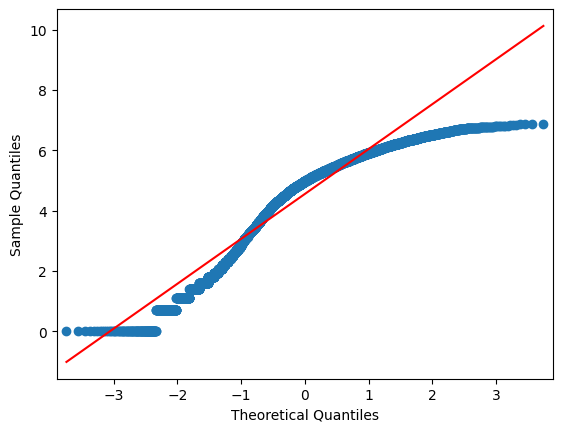

In [ ]:
# Create a Q-Q plot of the data to check for normality
sm.qqplot(df['count_n'], line='s')
plt.show()

In [ ]:
# Doing Shapiro's test to test for normality
stat, p = shapiro(df['count_n'])

# print the test statistic and p-value
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

Shapiro-Wilk test statistic: 0.915410578250885
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


So we can conclude that this is not normal distribution.
So, We ned to use other methods such as Box-Cox transformation or Yeo Jonshon transformation.
Since count has some Zeros 0 in t so we cant use Box-Cox transformation so we go with implementing Yeo Jonshon transformation.

In [ ]:
# Apply Yeo-Johnson transformation
df['count_n'], lambda_ = stats.yeojohnson(df['count'])

# Print the estimated lambda value
print('Lambda:', lambda_)

print('Transformed Data:', df['count_n'])

Lambda: 0.3043731383813852
Transformed Data: 0         4.496882
1         6.888325
2         6.237882
3         4.050305
4         0.771691
           ...    
10881    16.031410
10882    14.179336
10883    12.371342
10884    11.169664
10885     9.595145
Name: count_n, Length: 10886, dtype: float64


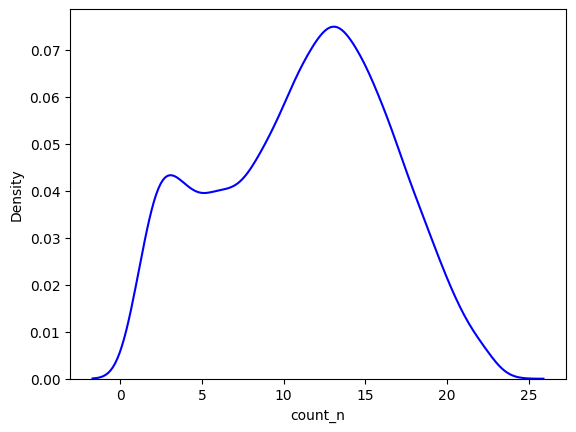

In [ ]:
sns.kdeplot(data = df, x = 'count_n', color = 'blue')
plt.show()

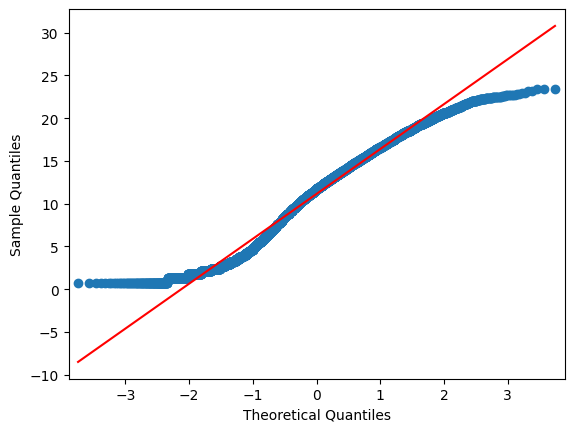

In [ ]:
# Create a Q-Q plot of the data to check for normality
sm.qqplot(df['count_n'], line='s')
plt.show()

In [ ]:
# Doing Shapiro's test to test for normality
stat, p = shapiro(df['count_n'])

# print the test statistic and p-value
print('Shapiro-Wilk test statistic:', stat)
print('p-value:', p)

Shapiro-Wilk test statistic: 0.977150022983551
p-value: 2.2935976822590735e-38


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


NOW WE CAN PROCEED WITH HYPOTHESIS TESTING

# Hypothesis Testing : if Working Day has an effect on the number of electric cycles rented

Null Hypothesis : there is no effect of the working day on the number of electric cycles rented

Alternate Hypotheis : There is a Significant Effect of the working day on the number of electric cycles rented

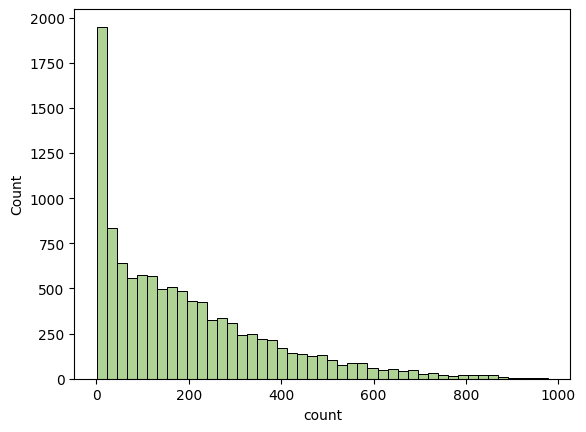

In [ ]:
sns.histplot(data = df, x = 'count', color = '#93C572')
plt.show()

In [ ]:
data_holiday = df[df['workingday'] == 0]['count_n'].values
data_weekday = df[df['workingday'] == 1]['count_n'].values

In [ ]:
t_statistic, p_value = stats.ttest_ind(data_weekday, data_holiday)

In [ ]:
t_stats, p_value = stats.ttest_ind(data_holiday,data_weekday) ## Performing 2-sample T-test
print('The p-value is:', p_value)

The p-value is: 0.8354242671219198


## ANOVA TESTING

No. of cycles rented is similar or different in different


a. weather

In [ ]:
#Performing Levene's Test for Equality of Variance

# Ho: Variance for all groups are equal
# Ha: Variance for atleast one group is different than the other

## We will perform ANOVA here.
w1 = df[df['weather'] == 1]['count_n'].values
w2 = df[df['weather'] == 2]['count_n'].values
w3 = df[df['weather'] == 3]['count_n'].values
w4 = df[df['weather'] == 4]['count_n'].values

stat, p_value = stats.levene(w1,w2,w3,w4)
print(f"Lavene's test statistic: {stat}")
print(f"p-value: {p_value}")

Lavene's test statistic: nan
p-value: nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Lavene's test statistic: 10.594341341011466
p-value: 5.942460194817725e-07

p-value << alpha(0.05), We fail to reject NULL Hypothesis, and can conclude that the p-value for atleast one weather group is different. Hence, here also our assumption is failing

In [ ]:
# a. weather
## Setting up Null and Alternate Hypothesis
## Ho = Mean of  all Weathers wrt to count is equal
## Ha = Atleast one weather group's mean is different

In [ ]:
## We will perform ANOVA here.
w1 = df[df['weather'] == 1]['count_n'].values
w2 = df[df['weather'] == 2]['count_n'].values
w3 = df[df['weather'] == 3]['count_n'].values
w4 = df[df['weather'] == 4]['count_n'].values

In [ ]:
t_stat, p_value = stats.f_oneway(w1,w2,w3,w4)
print('p-value=', p_value)

p-value= nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


p-value= 1.5951953006543422e-40

p-value << alpha(0.05), hence we reject Null hypothesis and can conclude that atleast one weather group is significantly different wrt to count from another. This was verified in Data Visualization too, where we saw that bike rentals are maximum on the day the weather is clear and least during low snow, rains and thunderstorms

In [ ]:
#Performing Levene's Test for Equality of Variance

# Ho: Variance for all groups are equal
# Ha: Variance for atleast one group is different than the other

## We will perform ANOVA here.
s1 = df[df['season'] == 1]['count_n'].values
s2 = df[df['season'] == 2]['count_n'].values
s3 = df[df['season'] == 3]['count_n'].values
s4 = df[df['season'] == 4]['count_n'].values

stat, p_value = stats.levene(s1,s2,s3,s4)
print(f"Lavene's test statistic: {stat}")
print(f"p-value: {p_value}")

Lavene's test statistic: 23.237061707387543
p-value: 5.483065863150724e-15


Lavene's test statistic: 23.237061707387543

p-value: 5.483065863150724e-15

p-value << alpha(0.05), We fail to reject NULL Hypothesis, and can conclude that the p-value for atleast one season group is different. Hence, here also our assumption is failing

In [ ]:
# b. seasons
## Setting up Null and Alternate Hypothesis
## Ho = Mean of  all Seasons wrt to count is equal
## Ha = Atleast one season group's mean is different

In [ ]:
## We will perform ANOVA here.
s1 = df[df['season'] == 1]['count_n'].values
s2 = df[df['season'] == 2]['count_n'].values
s3 = df[df['season'] == 3]['count_n'].values
s4 = df[df['season'] == 4]['count_n'].values

In [ ]:
t_stat, p_value = stats.f_oneway(s1,s2,s3,s4)
print('p-value=', p_value)

p-value= 6.892682231170661e-143


p-value= 6.892682231170661e-143

p-value << alpha(0.05), hence we reject Null hypothesis and can conclude that atleast one season group is significantly different wrt to count from another. This was verified in Data Visualization too, where we saw that bike rentals are maximum during fall and least during spring

3. Weather is dependent on the season?

In [ ]:
## Setting up Null and Alternate Hypothesis

## Ho = Weather is independent of season
## Ha = Weather is dependent on season

In [ ]:
## We will perform chi2 test
x = pd.crosstab(df['season'], df['weather'], margins = True)
x

weather,cloudy,misty,rainy,thunderstorm,All
season,,,,,
1,1759,715,211,1,2686
2,1801,708,224,0,2733
3,1930,604,199,0,2733
4,1702,807,225,0,2734
All,7192,2834,859,1,10886


In [ ]:
stats.chi2_contingency(x)

Chi2ContingencyResult(statistic=49.15865559689363, pvalue=3.1185273325126814e-05, dof=16, expected_freq=array([[1.77454639e+03, 6.99258130e+02, 2.11948742e+02, 2.46738931e-01,
        2.68600000e+03],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01,
        2.73300000e+03],
       [1.80559765e+03, 7.11493845e+02, 2.15657450e+02, 2.51056403e-01,
        2.73300000e+03],
       [1.80625831e+03, 7.11754180e+02, 2.15736359e+02, 2.51148264e-01,
        2.73400000e+03],
       [7.19200000e+03, 2.83400000e+03, 8.59000000e+02, 1.00000000e+00,
        1.08860000e+04]]))

p-value is equal to 0.00003118 which is extremely low (p-value << alpha), reject Ho Hence we can conclude that Weather is dependent on Season

# Insights:

The variables "temp," "atemp," and "humidity" appear to follow a normal distribution.


The variables "humidity," "casual," "registered," and "count" contain outliers in the data.


More bikes are rented during the summer and fall seasons compared to other seasons, which was verified using an ANOVA test.


There is a higher demand for bike rentals on holidays.


Bike rentals decrease during rainy, thunderstorm, snowy, and foggy weather conditions.


When the humidity is less than 20, the number of bikes rented is significantly low.


Bike rentals are lower when the temperature is below 10 or above 35.


There is a positive correlation between the variables "count" and "registered," as well as between "count" and "casual."


There is also a positive correlation between "count" and "temp"/"atemp,"
suggesting that as the temperature increases, bike rental count also increases.
There is a negative correlation between "count" and "humidity." As humidity increases, bike rental count tends to decrease.


The variables "count," "registered," and "casual" follow a log-normal distribution.


Bike rentals have significantly increased from 2011 to 2012.
The month of June has the maximum number of rentals, while January has the least.


Bike rentals are lowest on snowy days and highest on clear weather days.
The assumption of normality fails for the variable "count" as it follows a right-skewed distribution.


A 2-sample t-test suggests that the "Working Day" variable does not have a statistically significant impact on the count of rental bikes.
Using ANOVA, it was found that weather groups have a significant impact on bike rental count, with clear weather having the highest rentals and low snow, rain, and thunderstorms having the lowest.


Using ANOVA, it was found that the season groups also have a significant impact on bike rental count, with fall having the highest rentals and spring having the lowest.


Using a chi-square test, it was determined that weather is dependent on the season.


# Recommendations:

Yulu can implement marketing strategies to attract more casual users, such as offering first-time user discounts, referral bonuses, or other incentives.
Yulu should focus on attracting more customers on working days and position itself as an alternate mode of transport for commuting to work.

Offering special offers during peak business hours can help attract customers.
Yulu should consider weather and season conditions when planning their marketing and operations. They can introduce features that are more user-friendly during specific weather conditions and use customer profiling to tailor their offerings.


Yulu can introduce seasonal offers to attract new customer bases. For example, offering student discounts during summers or targeting school hours to cater to students.